#ADS Lab Test

#Name: Chetti Rishika

#HTNO: 2503B05204

#MTech - 1st year


#Question-1

# Using the dataset “KNN_regression_dataset.xlsx”, perform the following tasks:
###1. Load the dataset and display summary statistics of all features.
###2. Split the data into 80% training and 20% testing sets.
###3. Standardize/scale the input features appropriately.
###4. Build a KNN Regression model with k = 5 to predict Efficiency (%).
###5. Use the model to predict the target values for the test set.
###6. Calculate and report the following evaluation metrics:

*   Mean Absolute Error (MAE)
*   Root Mean Squared Error (RMSE)
*   R² Score

#Load Required Libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#Load Dataset & Display Summary Statistics

In [19]:
df = pd.read_excel("KNN_regression_dataset.xlsx")
print("Summary Statistics:\n")
print(df.describe())

Summary Statistics:

       FlowRate_LPM  InletTemp_C  PressureDrop_kPa  Efficiency_%
count   1000.000000  1000.000000       1000.000000   1000.000000
mean       5.412309    50.421038          2.760826     17.582045
std        2.629236    17.531394          1.308034      6.574029
min        1.041688    20.193096          0.500052      0.572450
25%        3.123759    34.464456          1.676079     12.967408
50%        5.471266    51.124034          2.752763     17.834897
75%        7.698876    65.627903          3.915966     22.455350
max        9.997459    79.964824          4.990194     34.491278


#Split into Features and Target

In [20]:
X = df[['FlowRate_LPM', 'InletTemp_C', 'PressureDrop_kPa']]
y = df['Efficiency_%']

 # Train-Test Split into 80% training and 20% testing sets.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

#Standardize Input Features

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Build KNN Regression Model (k=5)

In [23]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

#Predict on Test Set

In [24]:
y_pred = knn_model.predict(X_test_scaled)

#Evaluation Metrics

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nQuestion 1 — Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Question 1 — Evaluation Metrics:
Mean Absolute Error (MAE): 2.3897
Root Mean Squared Error (RMSE): 2.8723
R² Score: 0.8285


#Question 2

##Study the effect of different k-values on the performance of KNN Regression using the same dataset.
###1. Train four separate KNN Regression models with: k = 1, 3, 5 and 10
###2. For each model, compute and record the R² Score on the test data.
###3. Plot a graph of k vs R² Score.
###4. Identify which value of k gives the best performance.

# Different k values to test

In [26]:
k_values = [1, 3, 5, 10]
r2_scores = []

#Train KNN models for each k and calculate R²

In [27]:
print("\nR² Scores for Different k:")
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred_k = model.predict(X_test_scaled)
    r2_k = r2_score(y_test, y_pred_k)
    r2_scores.append(r2_k)
    print(f"k = {k} → R² Score = {r2_k:.4f}")


R² Scores for Different k:
k = 1 → R² Score = 0.8055
k = 3 → R² Score = 0.8257
k = 5 → R² Score = 0.8285
k = 10 → R² Score = 0.8472


#Plot k vs R²

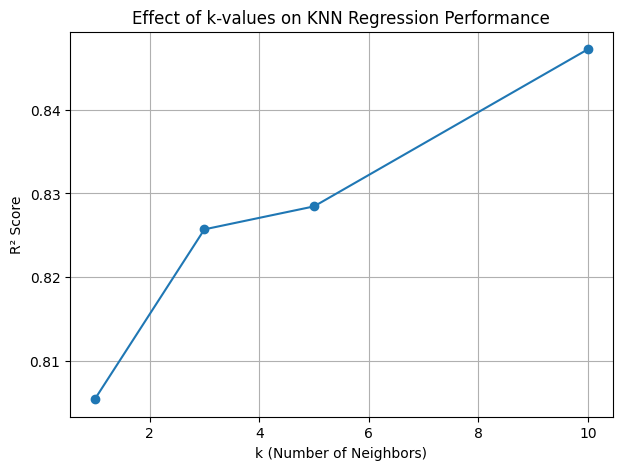

In [28]:
plt.figure(figsize=(7,5))
plt.plot(k_values, r2_scores, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("R² Score")
plt.title("Effect of k-values on KNN Regression Performance")
plt.grid(True)
plt.show()

#Identify Best k

In [29]:
best_k = k_values[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

print("\nBest Performing k-value:")
print(f"Best k = {best_k} with R² Score = {best_r2:.4f}")


Best Performing k-value:
Best k = 10 with R² Score = 0.8472
